# Range Kutta

O Range Kutta é um método numérico para resolver equações diferenciais ordinárias (EDOs) do tipo dy/dt = f(t, y). Em cada passo de tempo, calcula-se uma média ponderada de quatro estimativas de inclinação. Para resolver o sistema de equações diferenciais da reação de Belousov–Zhabotinsky, utilizou-se o método de Runge-Kutta de quarta ordem. O sistema foi discretizado espacialmente pelo método das linhas e, a cada passo temporal, as inclinações intermediárias foram calculadas conforme o esquema clássico do RK4. 

### 1 Simulação por Range Kutta de quarta ordem

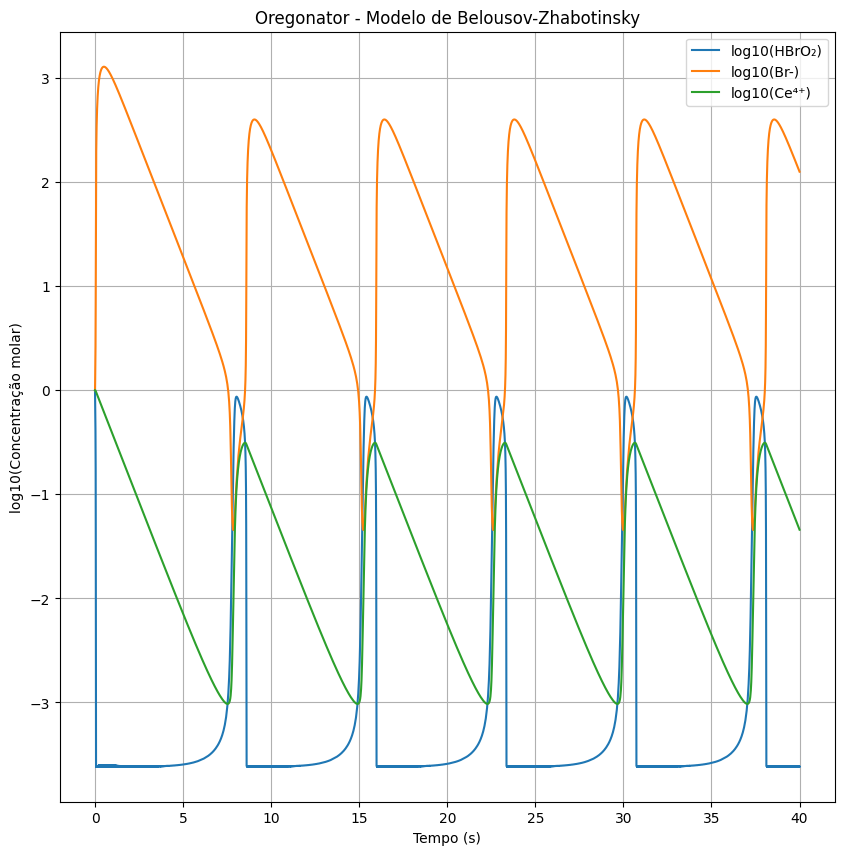

In [1]:
#Importação de bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ

# Parâmetros adimensionais
ef = 0.00012    # ε' - parâmetro de escala temporal para y
e = 0.036       # ε - parâmetro de escala temporal para x  
f = 1           # f - fator estequiométrico
q = 0.00024     # q - razão de reação

# Escolha das três condições iniciais de x,y,z em y0 
initial_values = [1, 1, 1] 

# Equação diferencial para ser computada
def Calculate(t, Y):
    x = Y[0] 
    y = Y[1] 
    z = Y[2] 
    dxdt = (q*y - x*y + x - x*x) * (1/e) 
    dydt = (-q*y - x*y + f*z) * (1/ef)
    dzdt = x - z 
    return [dxdt, dydt, dzdt]

# Computando os valores
solution = integ.solve_ivp(Calculate, [0, 40], initial_values, method='RK45', atol=1e-4, rtol=1e-6)
Y = solution.y 
timee = solution.t 

# Visualizando os resultados
xvalnew, yvalnew, zvalnew = [], [], []

# CORREÇÃO: Usando for loop para evitar problemas de incremento
for i in range(len(Y[0])):
    xvalnew.append(np.log10(Y[0][i]))
    yvalnew.append(np.log10(Y[1][i]))
    zvalnew.append(np.log10(Y[2][i]))

# Plotando os resultados
plt.figure(figsize=(10, 10))
plt.plot(timee, xvalnew, label='log10(HBrO₂)') 
plt.plot(timee, yvalnew, label='log10(Br-)') 
plt.plot(timee, zvalnew, label='log10(Ce⁴⁺)') 
plt.xlabel('Tempo (s)')
plt.ylabel('log10(Concentração molar)')
plt.title('Oregonator - Modelo de Belousov-Zhabotinsky')
plt.legend()
plt.grid() 
plt.savefig('range_kutta_solucao.png', dpi=300, bbox_inches='tight')
plt.show()

O gráfico evidencia a dinâmica temporal das espécies químicas calculadas pelo modelo Oregonator, em escala logarítmica. A natureza oscilatória da reação de Belousov–Zhabotinsky, caracterizada por rápidas etapas de autocatalise seguidas de períodos de consumo gradual, reproduzindo os ciclos periódicos observados experimentalmente, pode ser observada com sucesso.

### Dráfico 3D

Para apresentar o gráfico em três dimensões foi usado método de plotagem 3D no MatPlotLib [3]

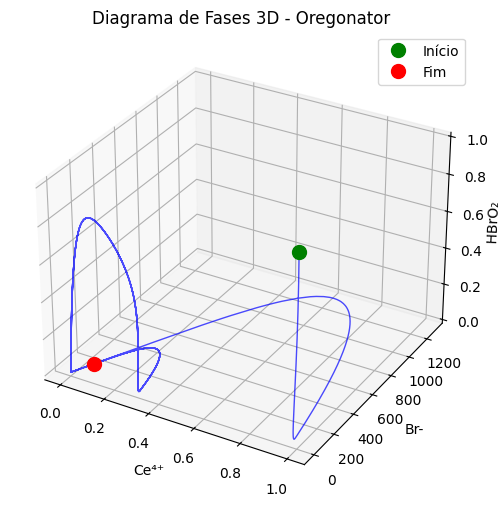

In [2]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

#Plota a trajetória no espaço de fases 3D
# Eixos: x (Ce⁴⁺) vs y (Br⁻) vs z (HBrO₂)
ax.plot(Y[2], Y[1], Y[0], 'b-', alpha=0.7, linewidth=1)

# Marca ponto inicial e final
ax.plot([Y[2][0]], [Y[1][0]], [Y[0][0]], 'go', markersize=10, label='Início')
ax.plot([Y[2][-1]], [Y[1][-1]], [Y[0][-1]], 'ro', markersize=10, label='Fim')

#Nomeia os eixos e o gráfico
ax.set_xlabel('Ce⁴⁺')      
ax.set_ylabel('Br-')  
ax.set_zlabel('\n HBrO₂ \n\n')  
ax.set_title('Diagrama de Fases 3D - Oregonator')
ax.legend()
plt.savefig('range_kutta_3D_invertido.png', dpi=300, bbox_inches='tight')
plt.show()

O gráfico 3D é mais uma forma de observar a adequação do modelo matemático e do método numérico utilizado, pois reproduz o comportamento esperado para reações de Belousov-Zhabotinsky em condições arbitrárias que apresenta ele fora do ciclo inicialmente e dentro do ciclo no final.

### Razões médias entre as concentrações
Abaixo está o calculo das razões médias entre as concentrações (em escala linear).

In [3]:
razao_xy = np.mean([10**x/10**y for x,y in zip(xvalnew, yvalnew) if 10**y > 0]) # Razão entre ácido bromoso e íon brometo
razao_xz = np.mean([10**x/10**z for x,z in zip(xvalnew, zvalnew) if 10**z > 0]) # Razão entre ácido bromoso e cério

print(f"\nRazões Médias")
print(f"HBrO₂/Br-: {razao_xy:.3f}")
print(f"HBrO₂/Ce⁴⁺: {razao_xz:.3f}") 


Razões Médias
HBrO₂/Br-: 0.482
HBrO₂/Ce⁴⁺: 0.741


Essa análise teórica mostra que as razões calculadas conectam-se com a teoria de sistemas dinâmicos não-lineares, observada também na resolução semi-analítica.

### Plano de fases
Um plano de fases é uma representação gráfica usada para visualizar o comportamento dinâmico de sistemas descritos por equações diferenciais, mostrando como o estado do sistema evolui ao longo do tempo em função de duas variáveis fundamentais [4]. Para fazer os gráficos foi usado como base o que é apresentado na fonte [5] e a estratégia de usar escala logarítima como foi feito para o método de Euler.

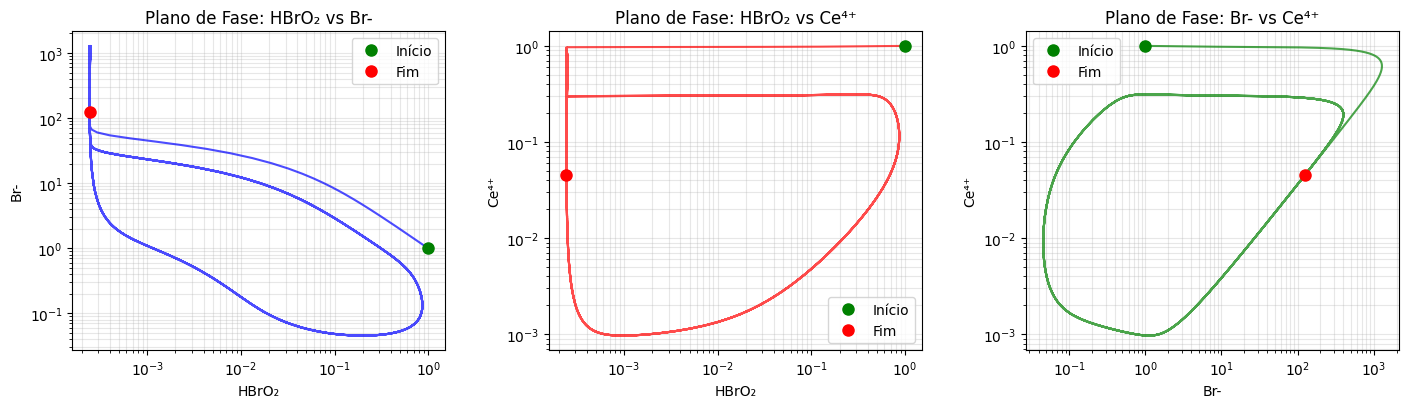

In [4]:
# Cria subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Configurar escala log para todos os eixos
for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True, which="both", ls="-", alpha=0.3)

# HBrO₂ vs Ce⁴⁺
axs[0].plot(Y[0], Y[1], 'b-', alpha=0.7)
axs[0].plot(Y[0][0], Y[1][0], 'go', markersize=8, label='Início')
axs[0].plot(Y[0][-1], Y[1][-1], 'ro', markersize=8, label='Fim')
axs[0].set_xlabel('HBrO₂')
axs[0].set_ylabel('Br-')
axs[0].set_title('Plano de Fase: HBrO₂ vs Br-')

# HBrO₂ vs z
axs[1].plot(Y[0], Y[2], 'r-', alpha=0.7)
axs[1].plot(Y[0][0], Y[2][0], 'go', markersize=8, label='Início')
axs[1].plot(Y[0][-1], Y[2][-1], 'ro', markersize=8, label='Fim')
axs[1].set_xlabel('HBrO₂')
axs[1].set_ylabel('Ce⁴⁺')
axs[1].set_title('Plano de Fase: HBrO₂ vs Ce⁴⁺')

# Ce⁴⁺ vs z
axs[2].plot(Y[1], Y[2], 'g-', alpha=0.7)
axs[2].plot(Y[1][0], Y[2][0], 'go', markersize=8, label='Início')
axs[2].plot(Y[1][-1], Y[2][-1], 'ro', markersize=8, label='Fim')
axs[2].set_xlabel('Br-')
axs[2].set_ylabel('Ce⁴⁺')
axs[2].set_title('Plano de Fase: Br- vs Ce⁴⁺')

# Adicionar legendas
for ax in axs:
    ax.legend()

plt.tight_layout(pad=4.0, w_pad=3.0)
plt.savefig('range_kutta_escala_log.png', dpi=300, bbox_inches='tight')
plt.show()

O gráfico dos planos de fase apresentadou um modelo da reação de Belousov–Zhabotinsky, sendo aplicado para mostrar as trajetórias que as concentrações das espécies químicas percorrem durante a evolução temporal, sendo a comparação entre cada dupla de reagentes principais, permitindo observar ciclos de oscilações, pontos de início e fim do processo, além de regiões de possível estabilidade ou transição entre estados químicos.

### Conclusão

o método de Runge-Kutta de quarta ordem (RK4), devido à sua precisão e estabilidade numérica, permitiu capturar de forma mais fidedigna os complexos comportamentos oscilatórios, os padrões de ondas químicas e a evolução temporal das concentrações, sendo, portanto, um ótimo método em investigações qualitativas robustas sobre a dinâmica não linear da reação Belousov–Zhabotinsky [5].

### Referências

[1] Misra, I., Ramanathan, V. Belousov–Zhabotinsky reaction: an open-source approach. Proc.Indian Natl. Sci. Acad. 88, 243–249 (2022). https://doi.org/10.1007/s43538-022-00081-6 

[2] Ai, J., Zhai, C., & Sun, W. (2020). Study on the Formation of Complex Chemical Waveforms by Different Computational Methods. Processes. https://doi.org/10.3390/pr8040393. 

[3] mpl_toolkits.mplot3d — Matplotlib 3.7.1 documentation. Disponível em: <https://matplotlib.org/stable/api/toolkits/mplot3d.html>.

[4] Wikipédia. Plano de fase — Wikipédia, a enciclopédia livre. https://pt.wikipedia.
org/wiki/Plano_de_fase. Acesso em: 25 nov. 2025. 2025.

[5] LespritSorcier. Reação oscilante de Belousov–Zhabotinsky. https://lespritsorcier.
org/blogs-membres/reaction-oscillante-de-belousov-zhabotinsky/. Acesso em: 25
nov. 2025. n.d.